<a href="https://colab.research.google.com/github/molofsky/ST-Alignment-Paste/blob/main/notebooks/Pairwise_Alignment_Paste2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Setup

In [1]:
!pip install -U -q PyDrive
!pip install anndata
!pip install scanpy
!pip install POT==0.8.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.0/103.0 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 48.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 5.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 51.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 9.3 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82816 sha256=a44141d25b968eb6f8ea2f74189a27c477cb4bc5b49a32d3b37b6ba157840ddb
  Stored in directory: /root/.cache/pip/wheels/a0/e8/c6/a37ea663620bd5200ea1ba0907ab3c217042c1d035ef606acc
  Created wheel for session-info: filename=session_info-1.0.0-py3-none-any.whl size=8026 sha256=8ce9606f4cd762b9ed02c7c3bf773dfa653f33b58293efbfb6b7e47181e2f13b
  Stored in directory: /root/.cache/pip/wheels/6a/aa

Authenticating Google Drive to download files

In [2]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [3]:
id = '1Emm9eRKYAdc1kwpI4_RWqJAsXwY5BnLK'
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('slice1_coords.csv')

id = '1uQ3OcOvgznBd0-YAyFM5IMm-9Atb0PMX'
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('slice1.h5')

id = '1Tix0CRW20diWZ9Y3Q4TvUa86CvUY6Gui'
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('slice2_coords.csv')

id = '12FJ8ph0MN4sNWqQQe1G4vrZNi05mf6Fx'
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('slice2.h5')

id = '1MQt_AyKssgWpXV64vYtQLO5SlYDUilSu'
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('slice3_coords.csv')

id = '1AQqbuLcfHc3hwsTrDVPyH_5Bdfsb9Z_b'
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('slice3.h5')

id = '1-zQsQbP0GXol0RuICGHp3tiaLQkfSFy-'
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('slice4_coords.csv')

id = '1iAEX8wrO49KldN1Zct928vHSEDeX2gzm'
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('slice4.h5')

id = '19J4fxCvPaotiFS6mMBPW48pYsDS937sL'
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('slice5_coords.csv')

id = '1VyzyoWBud-SIeleRKO99eFJMKs0koomI'
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('slice5.h5')

id = '1aVUdgL9arv4eVBCGFkpA7kRJMFKWQzqn'
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('slice6_coords.csv')

id = '1JBJkwZuB8ZAWJSyTaNinm6b5zCJoDeqg'
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('slice6.h5')

id = '1hEoMbe9Y04iotGCOFCJavC7Vg6qmTis0'
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('slice7_coords.csv')

id = '1j63oSsO5_crm2u75E_lKcXA_xq8ItwsE'
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('slice7.h5')

id = '1xZgN6rFVm80lLeKhN0zS0K3idUKBarVH'
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('slice8_coords.csv')

id = '1LKZcCaZylxkEDzJCoijrty4JqreUKzW5'
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('slice8.h5')

Cloning Github repo

In [4]:
!git clone https://github.com/raphael-group/paste2.git

Cloning into 'paste2'...
remote: Enumerating objects: 21, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 21 (delta 4), reused 21 (delta 4), pack-reused 0
Unpacking objects: 100% (21/21), 16.81 KiB | 2.40 MiB/s, done.


Importing required functions

In [5]:
from paste2.src.paste2.PASTE2 import partial_pairwise_align
from paste2.src.paste2.model_selection import select_overlap_fraction
from paste2.src.paste2.projection import partial_stack_slices_pairwise

Imports

In [6]:
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
import seaborn as sns
import ot

### Algorithm

Read data

In [7]:
slice_names = ["slice1", "slice2", "slice3", "slice4", "slice5", "slice6", "slice7", "slice8"]

def load_slices():
  slices = []
  for name in slice_names:
    adata_slice = sc.read_10x_h5(name + ".h5")
    coords_slice = np.genfromtxt(name + "_coords.csv", usecols=(2, 3), delimiter=',', skip_header=1)
    adata_slice.obsm['spatial'] = coords_slice
    # preprocess data
    sc.pp.filter_genes(adata_slice, min_counts = 15)
    sc.pp.filter_cells(adata_slice, min_counts = 100)
    slices.append(adata_slice)
  return slices

Find partial spot alignments

In [8]:
slices = load_slices()
slice1, slice2, slice3, slice4, slice5, slice6, slice7, slice8 = slices
pis = []

In [9]:
# first iteration
s = select_overlap_fraction(sliceA=slice1, sliceB=slice2)
pi = partial_pairwise_align(sliceA=slice1, sliceB=slice2, s=s)
pis.append(pi)

PASTE2 model selection procedure.
Starting GLM-PCA...
Iteration: 0 | deviance=1.1926E+7
Iteration: 1 | deviance=1.1876E+7
Iteration: 2 | deviance=8.6363E+6
Iteration: 3 | deviance=7.8831E+6
Iteration: 4 | deviance=7.6823E+6
Iteration: 5 | deviance=7.5791E+6
Iteration: 6 | deviance=7.5147E+6
Iteration: 7 | deviance=7.4724E+6
Iteration: 8 | deviance=7.4433E+6
Iteration: 9 | deviance=7.4223E+6
Iteration: 10 | deviance=7.4064E+6
Iteration: 11 | deviance=7.3940E+6
Iteration: 12 | deviance=7.3840E+6
Iteration: 13 | deviance=7.3760E+6
Iteration: 14 | deviance=7.3692E+6
Iteration: 15 | deviance=7.3635E+6
Iteration: 16 | deviance=7.3585E+6
Iteration: 17 | deviance=7.3542E+6
Iteration: 18 | deviance=7.3505E+6
Iteration: 19 | deviance=7.3471E+6
Iteration: 20 | deviance=7.3441E+6
Iteration: 21 | deviance=7.3415E+6
Iteration: 22 | deviance=7.3390E+6
Iteration: 23 | deviance=7.3369E+6
Iteration: 24 | deviance=7.3349E+6
Iteration: 25 | deviance=7.3331E+6
Iteration: 26 | deviance=7.3314E+6
Iteration: 

In [10]:
# second iteration
s = select_overlap_fraction(sliceA=slice2, sliceB=slice3)
pi = partial_pairwise_align(sliceA=slice2, sliceB=slice3, s=s)
pis.append(pi)

PASTE2 model selection procedure.
Starting GLM-PCA...
Iteration: 0 | deviance=1.2209E+7
Iteration: 1 | deviance=1.1960E+7
Iteration: 2 | deviance=8.5298E+6
Iteration: 3 | deviance=7.6365E+6
Iteration: 4 | deviance=7.3873E+6
Iteration: 5 | deviance=7.2682E+6
Iteration: 6 | deviance=7.1939E+6
Iteration: 7 | deviance=7.1465E+6
Iteration: 8 | deviance=7.1147E+6
Iteration: 9 | deviance=7.0916E+6
Iteration: 10 | deviance=7.0742E+6
Iteration: 11 | deviance=7.0606E+6
Iteration: 12 | deviance=7.0498E+6
Iteration: 13 | deviance=7.0410E+6
Iteration: 14 | deviance=7.0336E+6
Iteration: 15 | deviance=7.0275E+6
Iteration: 16 | deviance=7.0222E+6
Iteration: 17 | deviance=7.0176E+6
Iteration: 18 | deviance=7.0136E+6
Iteration: 19 | deviance=7.0101E+6
Iteration: 20 | deviance=7.0069E+6
Iteration: 21 | deviance=7.0041E+6
Iteration: 22 | deviance=7.0016E+6
Iteration: 23 | deviance=6.9994E+6
Iteration: 24 | deviance=6.9973E+6
Iteration: 25 | deviance=6.9955E+6
Iteration: 26 | deviance=6.9938E+6
Iteration: 

In [11]:
# third iteration
s = select_overlap_fraction(sliceA=slice3, sliceB=slice4)
pi = partial_pairwise_align(sliceA=slice3, sliceB=slice4, s=s)
pis.append(pi)

PASTE2 model selection procedure.
Starting GLM-PCA...
Iteration: 0 | deviance=1.0833E+7
Iteration: 1 | deviance=1.0598E+7
Iteration: 2 | deviance=7.7746E+6
Iteration: 3 | deviance=6.9068E+6
Iteration: 4 | deviance=6.6953E+6
Iteration: 5 | deviance=6.5923E+6
Iteration: 6 | deviance=6.5324E+6
Iteration: 7 | deviance=6.4950E+6
Iteration: 8 | deviance=6.4694E+6
Iteration: 9 | deviance=6.4507E+6
Iteration: 10 | deviance=6.4363E+6
Iteration: 11 | deviance=6.4251E+6
Iteration: 12 | deviance=6.4161E+6
Iteration: 13 | deviance=6.4088E+6
Iteration: 14 | deviance=6.4026E+6
Iteration: 15 | deviance=6.3974E+6
Iteration: 16 | deviance=6.3929E+6
Iteration: 17 | deviance=6.3890E+6
Iteration: 18 | deviance=6.3855E+6
Iteration: 19 | deviance=6.3824E+6
Iteration: 20 | deviance=6.3796E+6
Iteration: 21 | deviance=6.3771E+6
Iteration: 22 | deviance=6.3748E+6
Iteration: 23 | deviance=6.3726E+6
Iteration: 24 | deviance=6.3707E+6
Iteration: 25 | deviance=6.3689E+6
Iteration: 26 | deviance=6.3673E+6
Iteration: 

In [12]:
# fourth iteration
s = select_overlap_fraction(sliceA=slice4, sliceB=slice5)
pi = partial_pairwise_align(sliceA=slice4, sliceB=slice5, s=s)
pis.append(pi)

PASTE2 model selection procedure.
Starting GLM-PCA...
Iteration: 0 | deviance=1.0244E+7
Iteration: 1 | deviance=1.0237E+7
Iteration: 2 | deviance=7.3755E+6
Iteration: 3 | deviance=6.8436E+6
Iteration: 4 | deviance=6.6791E+6
Iteration: 5 | deviance=6.5927E+6
Iteration: 6 | deviance=6.5427E+6
Iteration: 7 | deviance=6.5109E+6
Iteration: 8 | deviance=6.4890E+6
Iteration: 9 | deviance=6.4731E+6
Iteration: 10 | deviance=6.4608E+6
Iteration: 11 | deviance=6.4511E+6
Iteration: 12 | deviance=6.4432E+6
Iteration: 13 | deviance=6.4366E+6
Iteration: 14 | deviance=6.4311E+6
Iteration: 15 | deviance=6.4264E+6
Iteration: 16 | deviance=6.4224E+6
Iteration: 17 | deviance=6.4188E+6
Iteration: 18 | deviance=6.4157E+6
Iteration: 19 | deviance=6.4130E+6
Iteration: 20 | deviance=6.4105E+6
Iteration: 21 | deviance=6.4083E+6
Iteration: 22 | deviance=6.4063E+6
Iteration: 23 | deviance=6.4045E+6
Iteration: 24 | deviance=6.4029E+6
Iteration: 25 | deviance=6.4014E+6
Iteration: 26 | deviance=6.4000E+6
Iteration: 

In [13]:
# fifth iteration
s = select_overlap_fraction(sliceA=slice5, sliceB=slice6)
pi = partial_pairwise_align(sliceA=slice5, sliceB=slice6, s=s)
pis.append(pi)

PASTE2 model selection procedure.
Starting GLM-PCA...
Iteration: 0 | deviance=1.0445E+7
Iteration: 1 | deviance=1.0435E+7
Iteration: 2 | deviance=7.5140E+6
Iteration: 3 | deviance=6.8649E+6
Iteration: 4 | deviance=6.7001E+6
Iteration: 5 | deviance=6.6145E+6
Iteration: 6 | deviance=6.5627E+6
Iteration: 7 | deviance=6.5286E+6
Iteration: 8 | deviance=6.5048E+6
Iteration: 9 | deviance=6.4873E+6
Iteration: 10 | deviance=6.4738E+6
Iteration: 11 | deviance=6.4630E+6
Iteration: 12 | deviance=6.4542E+6
Iteration: 13 | deviance=6.4469E+6
Iteration: 14 | deviance=6.4407E+6
Iteration: 15 | deviance=6.4354E+6
Iteration: 16 | deviance=6.4309E+6
Iteration: 17 | deviance=6.4268E+6
Iteration: 18 | deviance=6.4233E+6
Iteration: 19 | deviance=6.4202E+6
Iteration: 20 | deviance=6.4174E+6
Iteration: 21 | deviance=6.4149E+6
Iteration: 22 | deviance=6.4126E+6
Iteration: 23 | deviance=6.4105E+6
Iteration: 24 | deviance=6.4086E+6
Iteration: 25 | deviance=6.4069E+6
Iteration: 26 | deviance=6.4054E+6
Iteration: 

In [14]:
# sixth iteration
s = select_overlap_fraction(sliceA=slice6, sliceB=slice7)
pi = partial_pairwise_align(sliceA=slice6, sliceB=slice7, s=s)
pis.append(pi)

PASTE2 model selection procedure.
Starting GLM-PCA...
Iteration: 0 | deviance=1.1004E+7
Iteration: 1 | deviance=1.0980E+7
Iteration: 2 | deviance=7.5316E+6
Iteration: 3 | deviance=6.9253E+6
Iteration: 4 | deviance=6.7428E+6
Iteration: 5 | deviance=6.6487E+6
Iteration: 6 | deviance=6.5925E+6
Iteration: 7 | deviance=6.5563E+6
Iteration: 8 | deviance=6.5317E+6
Iteration: 9 | deviance=6.5142E+6
Iteration: 10 | deviance=6.5010E+6
Iteration: 11 | deviance=6.4908E+6
Iteration: 12 | deviance=6.4826E+6
Iteration: 13 | deviance=6.4759E+6
Iteration: 14 | deviance=6.4703E+6
Iteration: 15 | deviance=6.4655E+6
Iteration: 16 | deviance=6.4615E+6
Iteration: 17 | deviance=6.4579E+6
Iteration: 18 | deviance=6.4548E+6
Iteration: 19 | deviance=6.4521E+6
Iteration: 20 | deviance=6.4497E+6
Iteration: 21 | deviance=6.4475E+6
Iteration: 22 | deviance=6.4456E+6
Iteration: 23 | deviance=6.4438E+6
Iteration: 24 | deviance=6.4422E+6
Iteration: 25 | deviance=6.4407E+6
Iteration: 26 | deviance=6.4393E+6
Iteration: 

In [15]:
# seventh iteration
s = select_overlap_fraction(sliceA=slice7, sliceB=slice8)
pi = partial_pairwise_align(sliceA=slice7, sliceB=slice8, s=s)
pis.append(pi)

PASTE2 model selection procedure.
Starting GLM-PCA...
Iteration: 0 | deviance=1.2530E+7
Iteration: 1 | deviance=1.2395E+7
Iteration: 2 | deviance=8.6043E+6
Iteration: 3 | deviance=7.8129E+6
Iteration: 4 | deviance=7.6014E+6
Iteration: 5 | deviance=7.4899E+6
Iteration: 6 | deviance=7.4212E+6
Iteration: 7 | deviance=7.3749E+6
Iteration: 8 | deviance=7.3412E+6
Iteration: 9 | deviance=7.3154E+6
Iteration: 10 | deviance=7.2950E+6
Iteration: 11 | deviance=7.2786E+6
Iteration: 12 | deviance=7.2653E+6
Iteration: 13 | deviance=7.2545E+6
Iteration: 14 | deviance=7.2454E+6
Iteration: 15 | deviance=7.2378E+6
Iteration: 16 | deviance=7.2314E+6
Iteration: 17 | deviance=7.2259E+6
Iteration: 18 | deviance=7.2211E+6
Iteration: 19 | deviance=7.2168E+6
Iteration: 20 | deviance=7.2130E+6
Iteration: 21 | deviance=7.2097E+6
Iteration: 22 | deviance=7.2066E+6
Iteration: 23 | deviance=7.2038E+6
Iteration: 24 | deviance=7.2013E+6
Iteration: 25 | deviance=7.1990E+6
Iteration: 26 | deviance=7.1969E+6
Iteration: 

Project ST slices onto 2D coordinate system

In [16]:
new_slices = partial_stack_slices_pairwise(slices, pis)

Plot ST slice

In [37]:
def plot_slice(adata, title):
  plt.figure()
  x = adata.obsm['spatial'][:, 0]
  y = adata.obsm['spatial'][:, 1]
  sns.scatterplot(x=x, y=y).set(title=title, xticks=[], yticks=[])
  sns.despine(left=True, bottom=True)
  plt.show()

Plotting ST slices

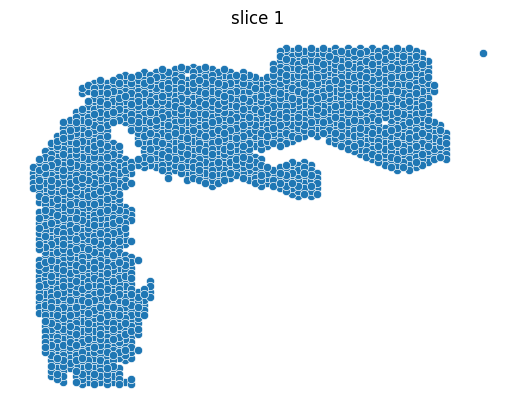

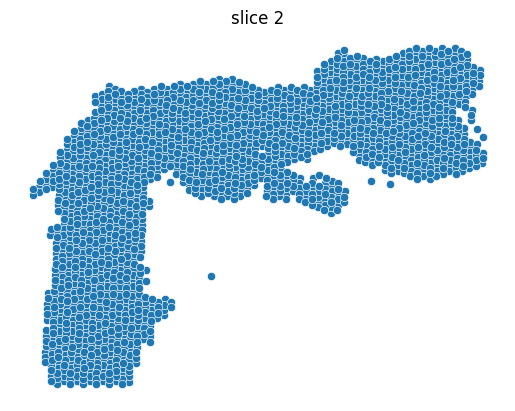

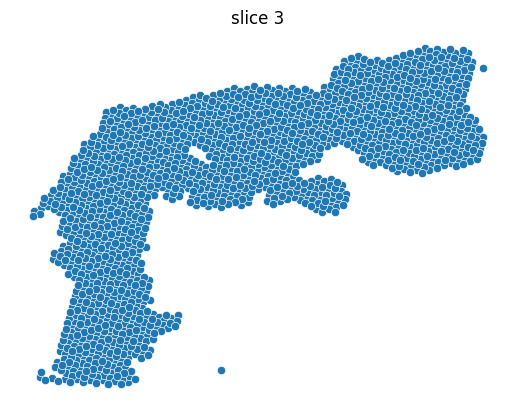

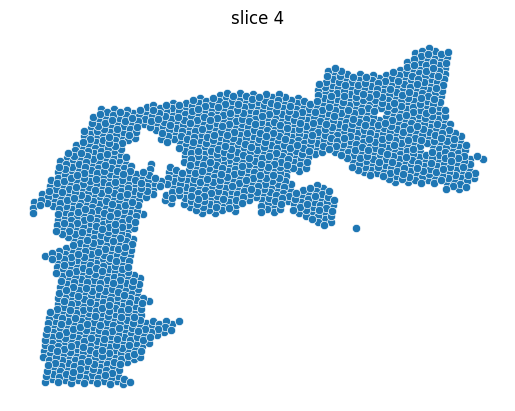

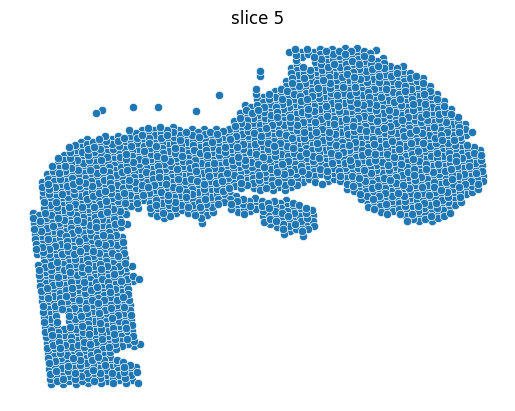

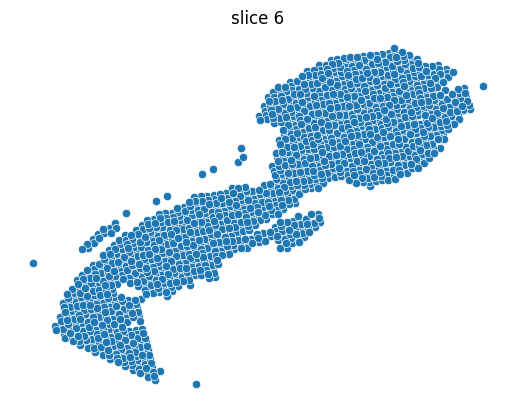

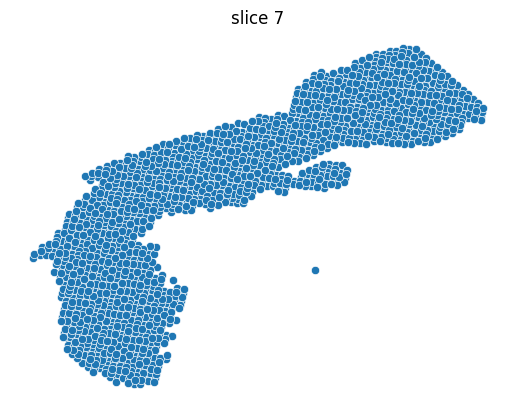

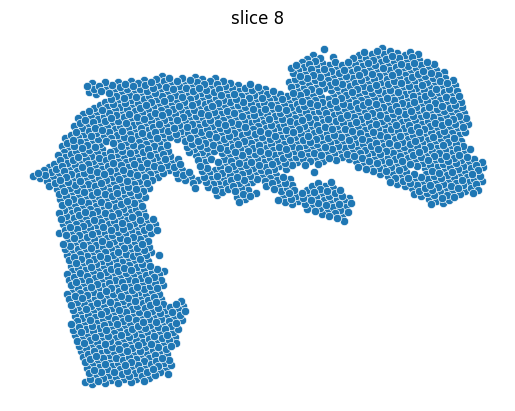

In [38]:
for i in range(len(new_slices)):
  plot_slice(new_slices[i], "slice " + str(i + 1))